In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, mode

In [2]:
df = pd.read_csv("fitness_dataset.csv")
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


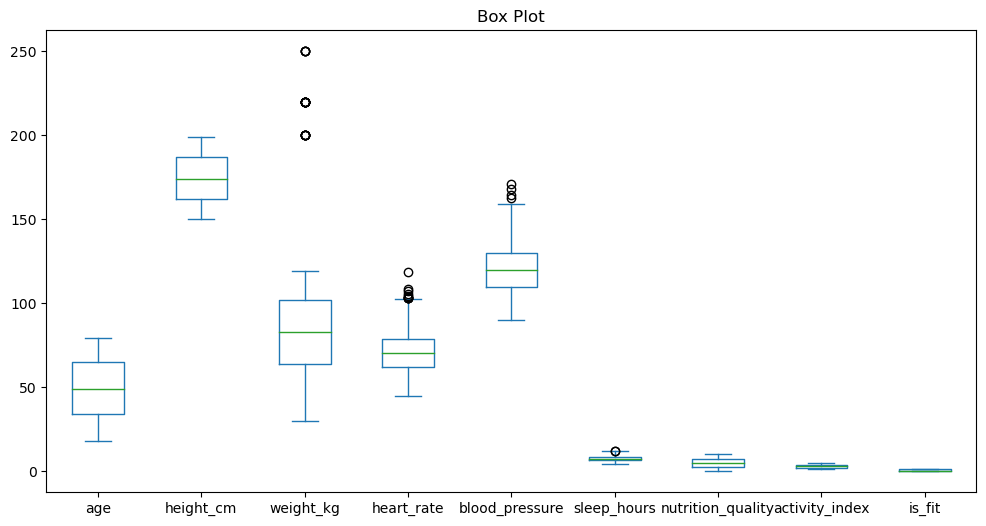

In [3]:
df.plot(kind="box", figsize=(12,6))
plt.title("Box Plot")
plt.show()

In [4]:
num_df = df.select_dtypes(include=[np.number])

In [5]:
results = {}

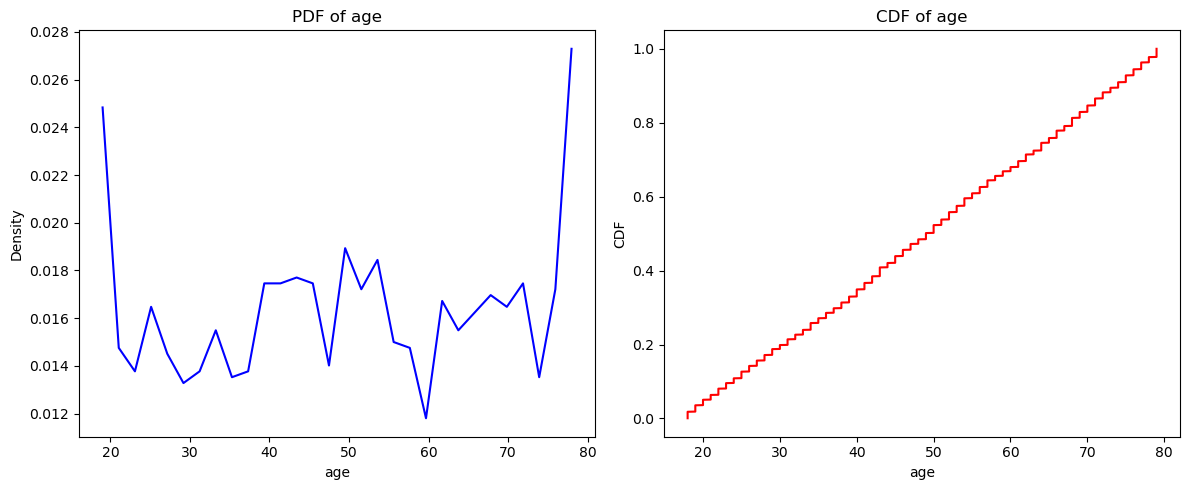

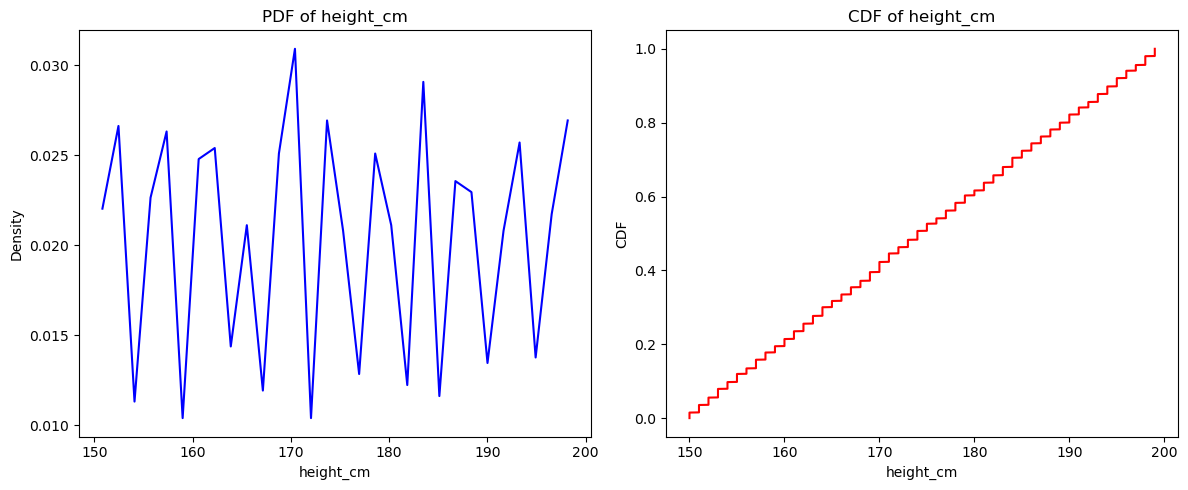

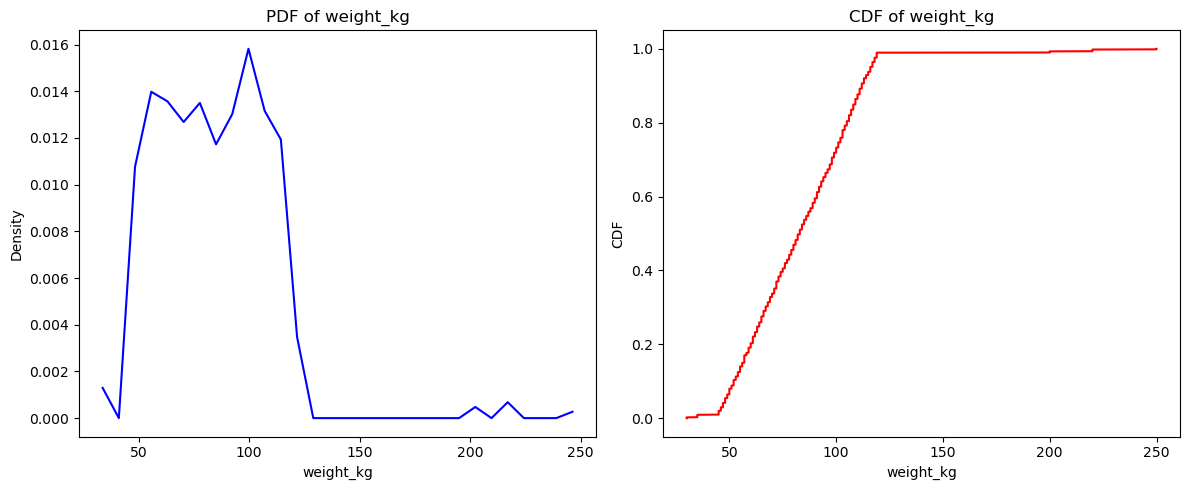

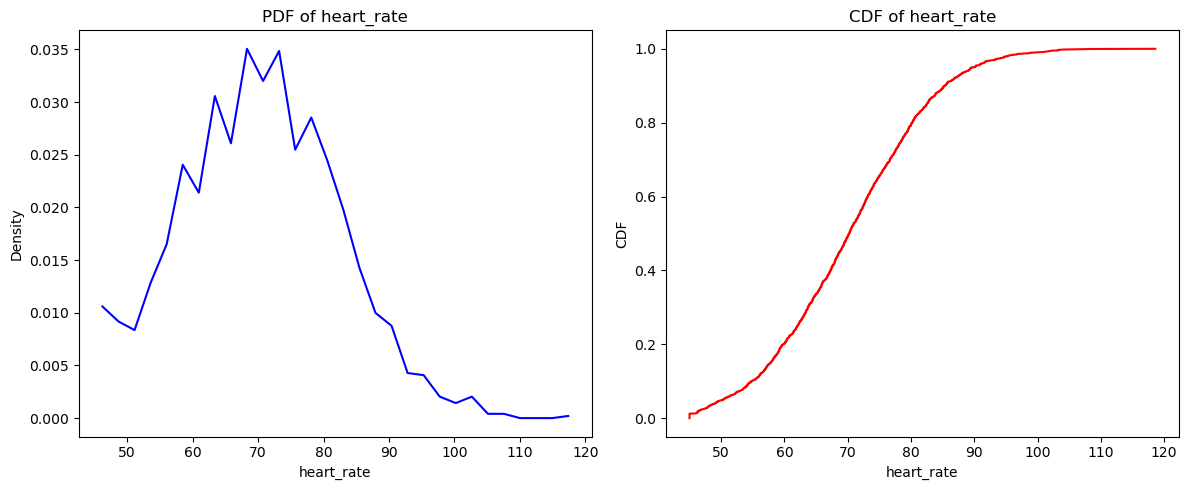

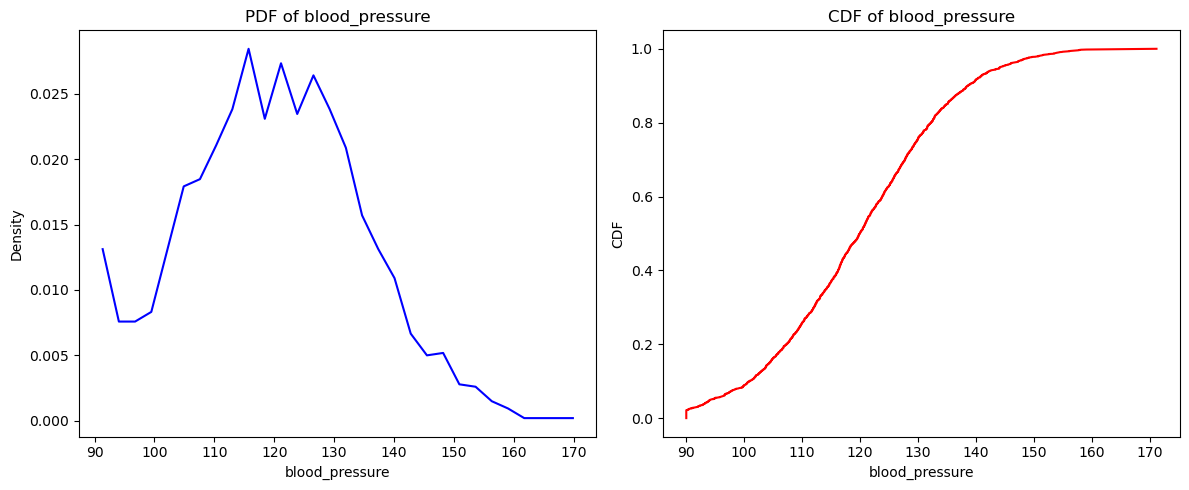

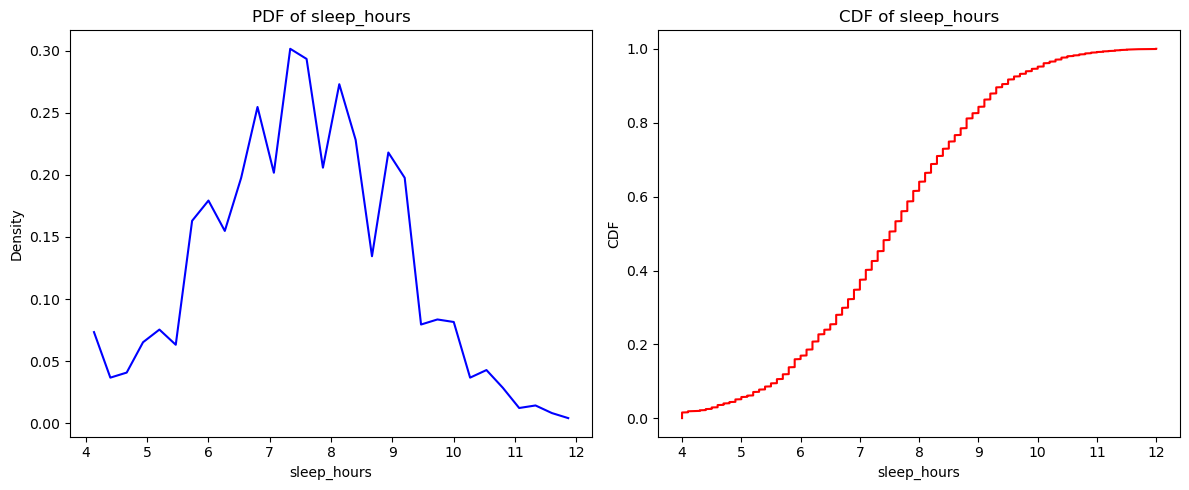

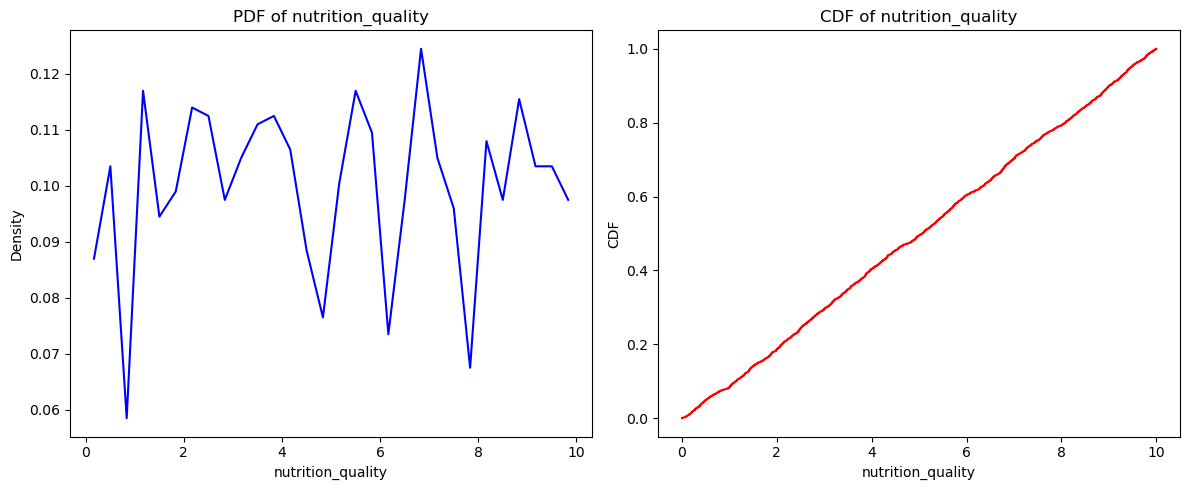

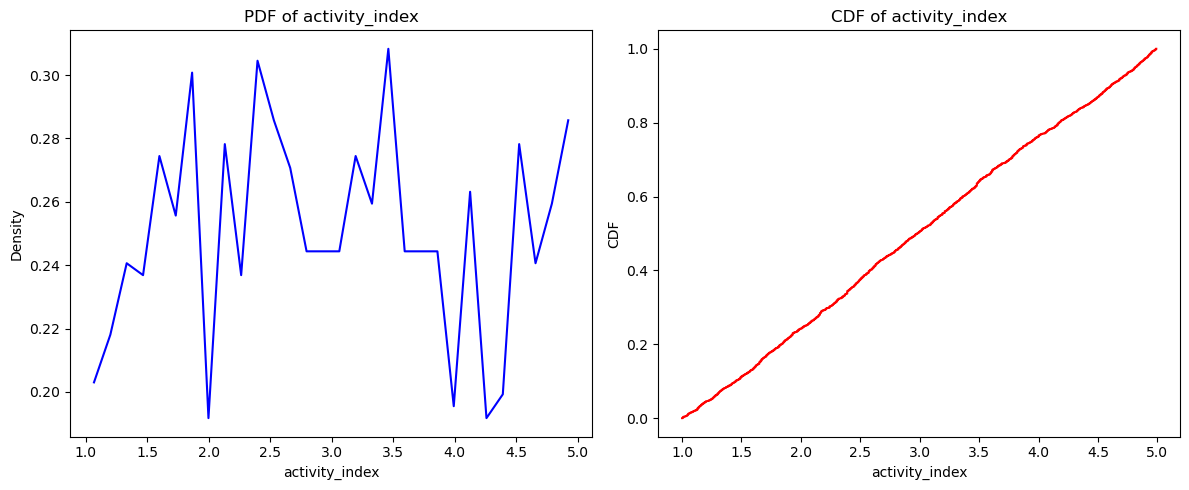

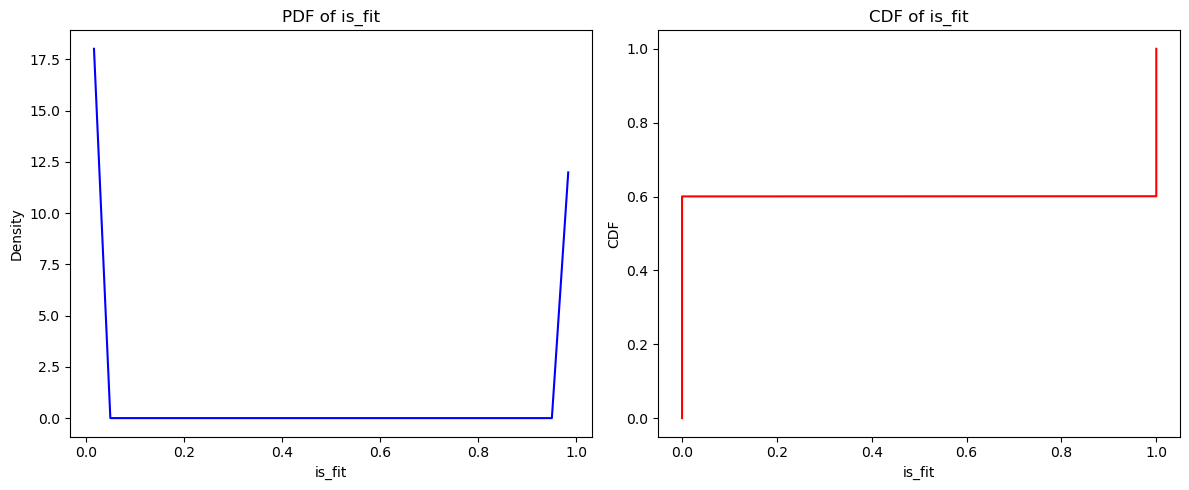

In [6]:
# Loop through numerical columns
for col in num_df.columns:
    data = num_df[col].dropna()
    sorted_data = np.sort(data)
    # PDF (normalized histogram)
    pdf_y, pdf_x = np.histogram(data, bins=30, density=True)
    pdf_x = (pdf_x[1:] + pdf_x[:-1]) / 2  # midpoints of bins
    # CDF
    cdf_y = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    # Statistics
    mean_val = data.mean()
    median_val = data.median()
    mode_val = mode(data, keepdims=True).mode[0]
    skew_val = skew(data)
    results[col] = {
        "Mean": mean_val,
        "Median": median_val,
        "Mode": mode_val,
        "Skewness": skew_val}
# Plot PDF and CDF
    plt.figure(figsize=(12,5))
     # PDF
    plt.subplot(1,2,1)
    plt.plot(pdf_x, pdf_y, color="blue")
    plt.title(f"PDF of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    # CDF
    plt.subplot(1,2,2)
    plt.plot(sorted_data, cdf_y, color="red")
    plt.title(f"CDF of {col}")
    plt.xlabel(col)
    plt.ylabel("CDF")
    
    plt.tight_layout()
    plt.show()

In [7]:
summary_df = pd.DataFrame(results).T
print("\n--- Summary Statistics ---")
print(summary_df)


--- Summary Statistics ---
                         Mean   Median    Mode  Skewness
age                 49.114000   49.000   43.00 -0.037853
height_cm          174.533000  174.000  170.00  0.010296
weight_kg           83.540500   83.000  103.00  1.430172
heart_rate          70.288600   70.250   45.00  0.147218
blood_pressure     119.908850  120.000   90.00  0.098167
sleep_hours          7.513315    7.500    7.40 -0.018256
nutrition_quality    5.035140    5.065    9.38  0.011463
activity_index       2.999040    2.980    2.39  0.041984
is_fit               0.399500    0.000    0.00  0.410375


In [8]:
df['sleep_hours'].isna().sum()


160

In [9]:
df = df.dropna(subset=['sleep_hours'])


In [10]:
df['sleep_hours'].isna().sum()

0